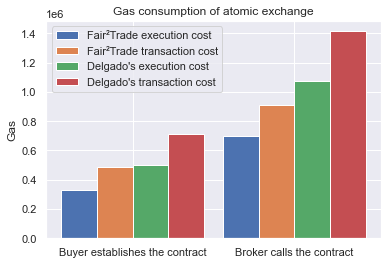

In [96]:
import numpy as np
import seaborn as sns

sns.set()

N = 2
FairTradeExecution = (331168, 697699)
FairTradeTransaction = (488960, 911383)
DelgadoExecution = (502537, 1078115)
DelgadoTransaction = (714249, 1415431)

ind = np.arange(N) 
width = 0.22       
plt.bar(ind, FairTradeExecution, width, label='Fair\u00b2Trade execution cost')
plt.bar(ind + width, FairTradeTransaction, width, label='Fair\u00b2Trade transaction cost')
plt.bar(ind + width*2, DelgadoExecution, width, label='Delgado\'s execution cost')
plt.bar(ind + width*3, DelgadoTransaction, width, label='Delgado\'s transaction cost')

plt.ylabel('Gas')
plt.title('Gas consumption of atomic exchange')

plt.xticks(ind + width *(3/2) , ('Buyer establishes the contract', 'Broker calls the contract'))
plt.legend(loc='best')
plt.savefig('AtomicCost.pdf', bbox_inches='tight')
plt.show()

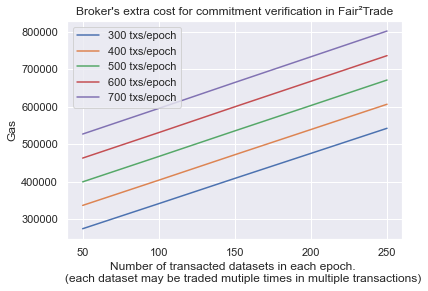

In [92]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
  
# create data
x = ['50', '100', '150', '200', '250'] # number of traded datasets
y1 = np.array([273997, 341056, 408635, 475521, 542610]) # 300 txs in total
y2 = np.array([336343, 403812, 471890, 539330, 606900]) # 400 txs in total
y3 = np.array([399350, 467194, 535710, 603548, 671684]) # 500 txs in total
y4 = np.array([462923, 531128, 600155, 668379, 736889]) # 600 txs in total
y5 = np.array([527216, 595783, 665189, 733919, 802719]) # 700 txs in total
  
# plot bars in stack manner
plt.plot(x, y1, label='300 txs/epoch')
plt.plot(x, y2, label='400 txs/epoch')
plt.plot(x, y3, label='500 txs/epoch')
plt.plot(x, y4, label='600 txs/epoch')
plt.plot(x, y5, label='700 txs/epoch')


plt.xlabel("Number of transacted datasets in each epoch. \n \
    (each dataset may be traded mutiple times in multiple transactions)")
plt.ylabel("Gas")
plt.legend()
plt.title("Broker\'s extra cost for commitment verification in Fair\u00b2Trade")
plt.savefig('BrokerExtraF2T.pdf', bbox_inches='tight')
plt.show()

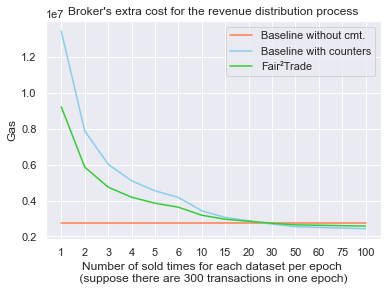

In [99]:
# initial gas used for the genesis hash chain: 42661
# followed-up gas used for update hash chain: 28613/tx
genCost = 21680 + 7641 * 299
# initial gas used for genesis counter: 42811
# followed-up gas used for update counter: 28624/tx
a = 21830
b = 7655
# extra withdraw cost on original baseline
c = 9202
# we test average transaction times for each data
# we have a set for the number of dataset [300, 150, 100, 75, 60, 50, 30, 20, 15, 10, 6]
x = ['1', '2', '3', '4', '5', '6', '10', '15', '20', '30', '50', '60', '75', '100']

# gas cost of validate the hash chain and merkle root
y0 = np.array([613174, 408899, 341080, 308010, 286375, 274057, 246324, 233385, 226327, 220054, 214160, 213249, 210851, 209761])
# gas cost of validate the counters
y1 = np.array([591709, 307642, 213164, 165983, 137641, 118775, 81054, 62174, 52748, 39713, 35785, 33885, 31998, 30111])
# gas cost of commitment generation in ours
y2 = np.array([genCost for _ in range(14)])
# gas cost of commitment generation in the suggested bsl
y3 = np.array([(a * (300 / int(x[i])) + b * (300 - (300 / int(x[i])))) for i in range(14)])
# gas cost for each transfer tx
y4 = np.array([(21000 * (300 / int(x[i]))) for i in range(14)])
# gas cost for naive baseline
y5 = np.array([c * 300 for _ in range(14)])

plt.plot(x, y5, label='Baseline without cmt.', color = 'coral')
plt.plot(x, y1 + y3 + y4, label = 'Baseline with counters', color = 'skyblue')
plt.plot(x, y0 + y2 + y4, label = 'Fair\u00b2Trade', color = 'limegreen')


plt.xlabel("Number of sold times for each dataset per epoch \n (suppose there are 300 transactions in one epoch) ")
plt.ylabel("Gas")
plt.legend()
plt.title("Broker\'s extra cost for the revenue distribution process")
plt.savefig('CostBasedOnTxFrequency.pdf', bbox_inches='tight')
plt.show()

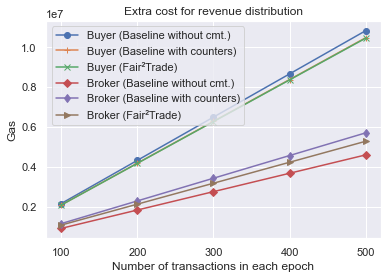

In [1]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
  
# We have three works, Fair2Trade (ours), Original baseline, and Improved baseline (counters)
# F2T extra cost
FtBuy = 20899
FtBrkIni = 21680
FtBrkRpt = 7641 
#Improved Baseline
ImpBslBuy = 20943
ImpBslBrkIni = 21830
ImpBslBrkRpt = 7655
#Original Baseline
OrgBslBuy = 21649
OrgBslBrk = 9202

# create data
x = ['100', '200', '300', '400', '500'] # number of transactions in each epoch
y5 = np.array([OrgBslBrk * int(x[i]) for i in range(5)]) # each cost 9202 extra gas
y6 = np.array([OrgBslBuy * int(x[i]) for i in range(5)]) # each cost 21649 extra gas
y7 = np.array([229777, 430656, 631186, 836101, 1042800]) # tested in truffle
y4 = np.array([98032, 171934, 246360, 322368, 399350])
y0 = np.array([(FtBrkIni + FtBrkRpt * (int(x[i]) - 1)) for i in range(5)])
y8 = np.array([FtBuy * int(x[i]) for i in range(5)]) # each buyer in FT cost 20899 extra gas

y1 = np.array([ImpBslBuy * int(x[i]) for i in range(5)]) # each buyer in imrpoved bsl extra gas
y2 = np.array([(ImpBslBrkIni * (int(x[i]) / 10) + ImpBslBrkRpt * (int(x[i]) - int(x[i]) / 10)) for i in range(5)])
y3 = np.array([43310, 62174, 81054, 99925, 118775])

y9 = np.array([21000*10, 21000*20, 21000*30, 21000*40, 21000*50]) # each transfer transaction need 21000 gas
# each dataset is traded 10 times
# A standard ETH transfer requires a gas limit of 21,000 units of gas.
# https://ethereum.org/en/developers/docs/gas/#:~:text=An%20ETH%20transfer%20requires%2021%2C000,base%20fee%20is%2010%20gwei.

  
# plot bars in stack manner
plt.plot(x, y6, '-o', label='Buyer (Baseline without cmt.)') # to be named as FairTrade* in the paper
plt.plot(x, y1, '-+', label='Buyer (Baseline with counters)')
plt.plot(x, y8, '-x', label='Buyer (Fair\u00b2Trade)')
plt.plot(x, y5, '-D', label='Broker (Baseline without cmt.)')
plt.plot(x, y2+y9+y3, '-d', label='Broker (Baseline with counters)')
plt.plot(x, y4+y9+y0, '->', label='Broker (Fair\u00b2Trade)') # total extra cost = cmt ver + coin_transfer * 10 + hashchain




plt.xlabel("Number of transactions in each epoch")
plt.ylabel("Gas")
plt.legend()
plt.title("Extra cost for revenue distribution")
plt.savefig('DistributionCost.pdf', bbox_inches='tight')
plt.show()